<a href="https://colab.research.google.com/github/bluemoon-17/2025-1-myclass-BDA/blob/main/inclass/Big_Data_Analyst_%EA%B3%BC%EC%A0%9C_01_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Analyst 과제 1 타이타닉

3조 BigData팀

팀원 : 20231560 지혜민, 20231589 지윤아, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;20241485 조예은, 20241525 이소윤, 20242511 이현승

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize_matplotlib

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [5]:
# PC에서 그림 설정
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [6, 4]})

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [7]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [8]:
!pip install pyreadstat

## 1. 데이터 로딩 및 출력하기
- Colab에 데이터 업로드
- 데이터 구조 확인
- 생존자 비율 확인


In [9]:
titanic = pd.read_csv('titanic1309.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [10]:
titanic.shape # 데이터 프레임의 크기

(1309, 12)

In [11]:
titanic.columns # 열 목록 확

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titanic.info() # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [13]:
titanic.describe() # 수치형 변수 요약 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.48,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


In [14]:
titanic['Survived'].value_counts() # 생존 여부 분포 (0 =  사망, 1 = 생존)

,count
Survived,
0,815
1,494


##

## 2. 데이터 전처리 및 결측치 확인

#### 결측치 처리(Missing Data Handling)
- 결측치 확인, 적절히 채우거나 제거하는 작업 필요

In [15]:
# 1. 결측치 갯수 확인
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [16]:
# 2. Age 결측치 채우기(중앙 값)
age_median = titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace=True)

<ipython-input-16-7d5a328ebd64>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(age_median, inplace=True)


In [17]:
# 3. Cabin 결측치 제거
titanic.drop('Cabin', axis = 1, inplace = True)

In [18]:
# 4. Embarked 결측치는 최빈값으로 채우기
embarked_mode = titanic['Embarked'].mode()[0] # 최빈값 추출
titanic['Embarked'].fillna(embarked_mode, inplace = True)

<ipython-input-18-1dc18de8c97e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(embarked_mode, inplace = True)


In [19]:
# 5. 처리 후 다시 결측치 확인
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


#### 데이터 시각화 및 변수 탐색
- 변수별 분포와 생존 여부의 관계 시각화

In [20]:
# 라이브러리 불러오기

import seaborn as sns
import matplotlib.pyplot as plt

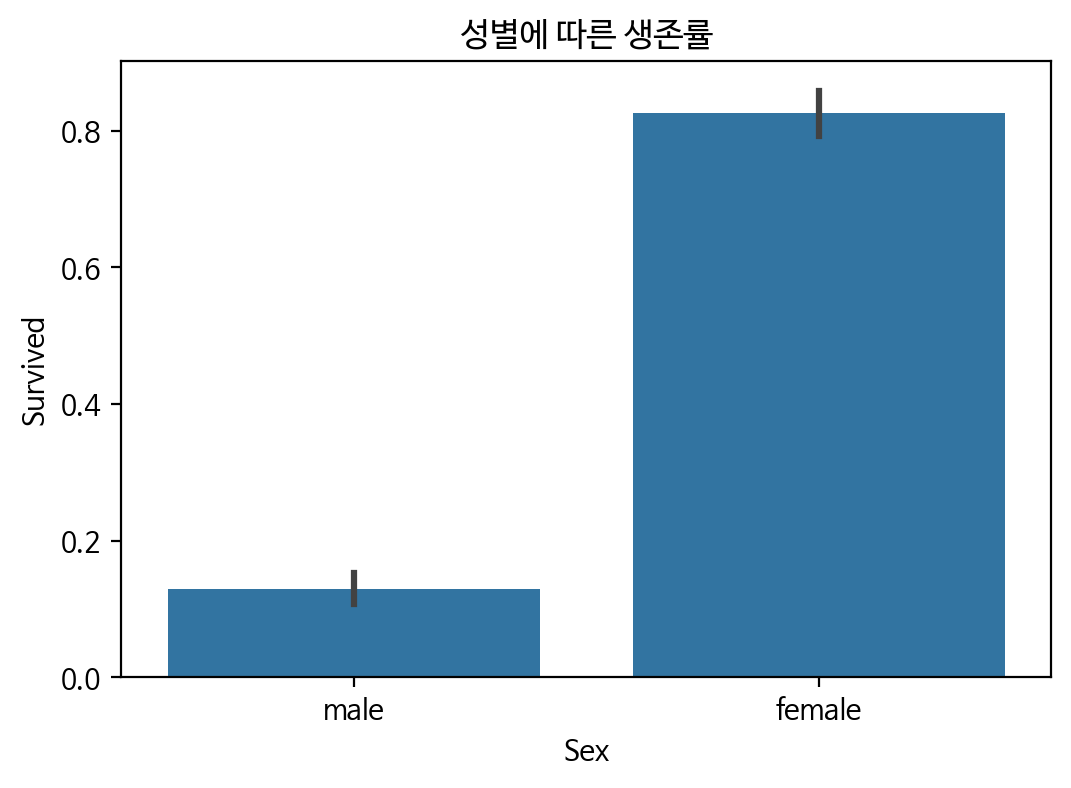

In [23]:
# 1. 성별(Sex)과 생존률 시각화(막대그래프)

sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('성별에 따른 생존률')
plt.show()

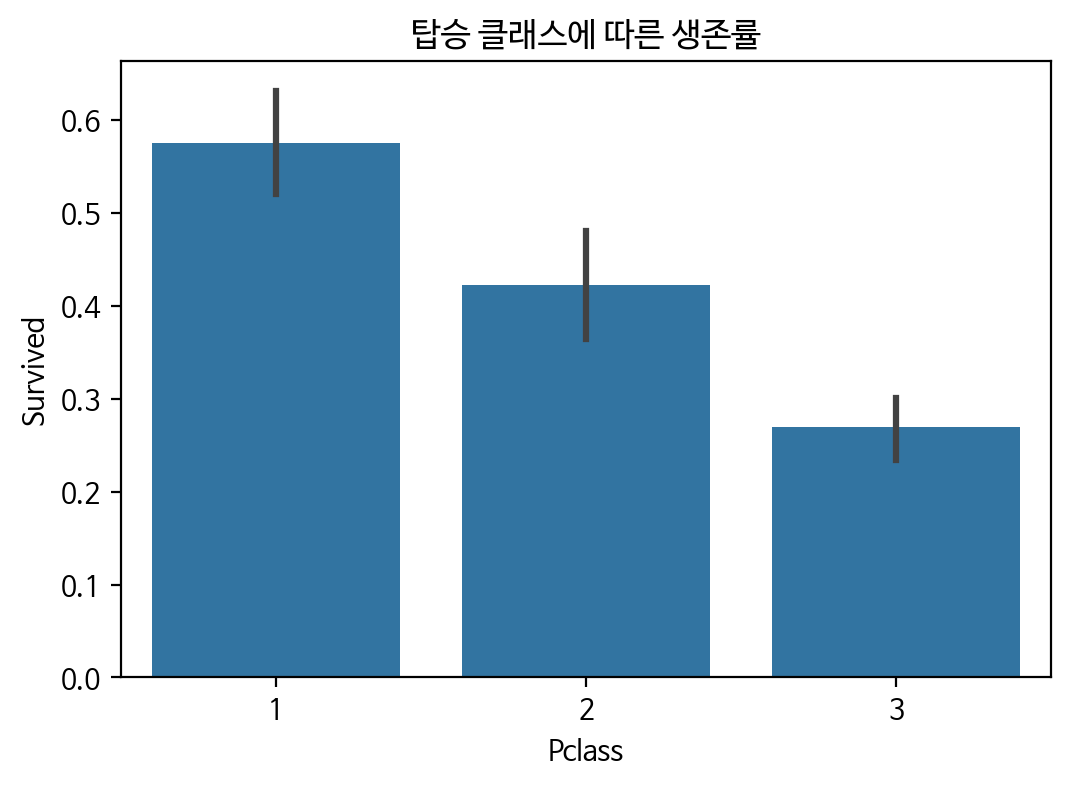

In [22]:
# 2. 탑승 클래스(Pclass)와 생존률 시각화(막대그래프)

sns.barplot(x = 'Pclass', y = 'Survived', data = titanic)
plt.title("탑승 클래스에 따른 생존률")
plt.show()

#### 나이(Age) 분포와 생존 여부 시각화

###### 히스토 그램 (생존자와 사망자 나이 분포 비교)

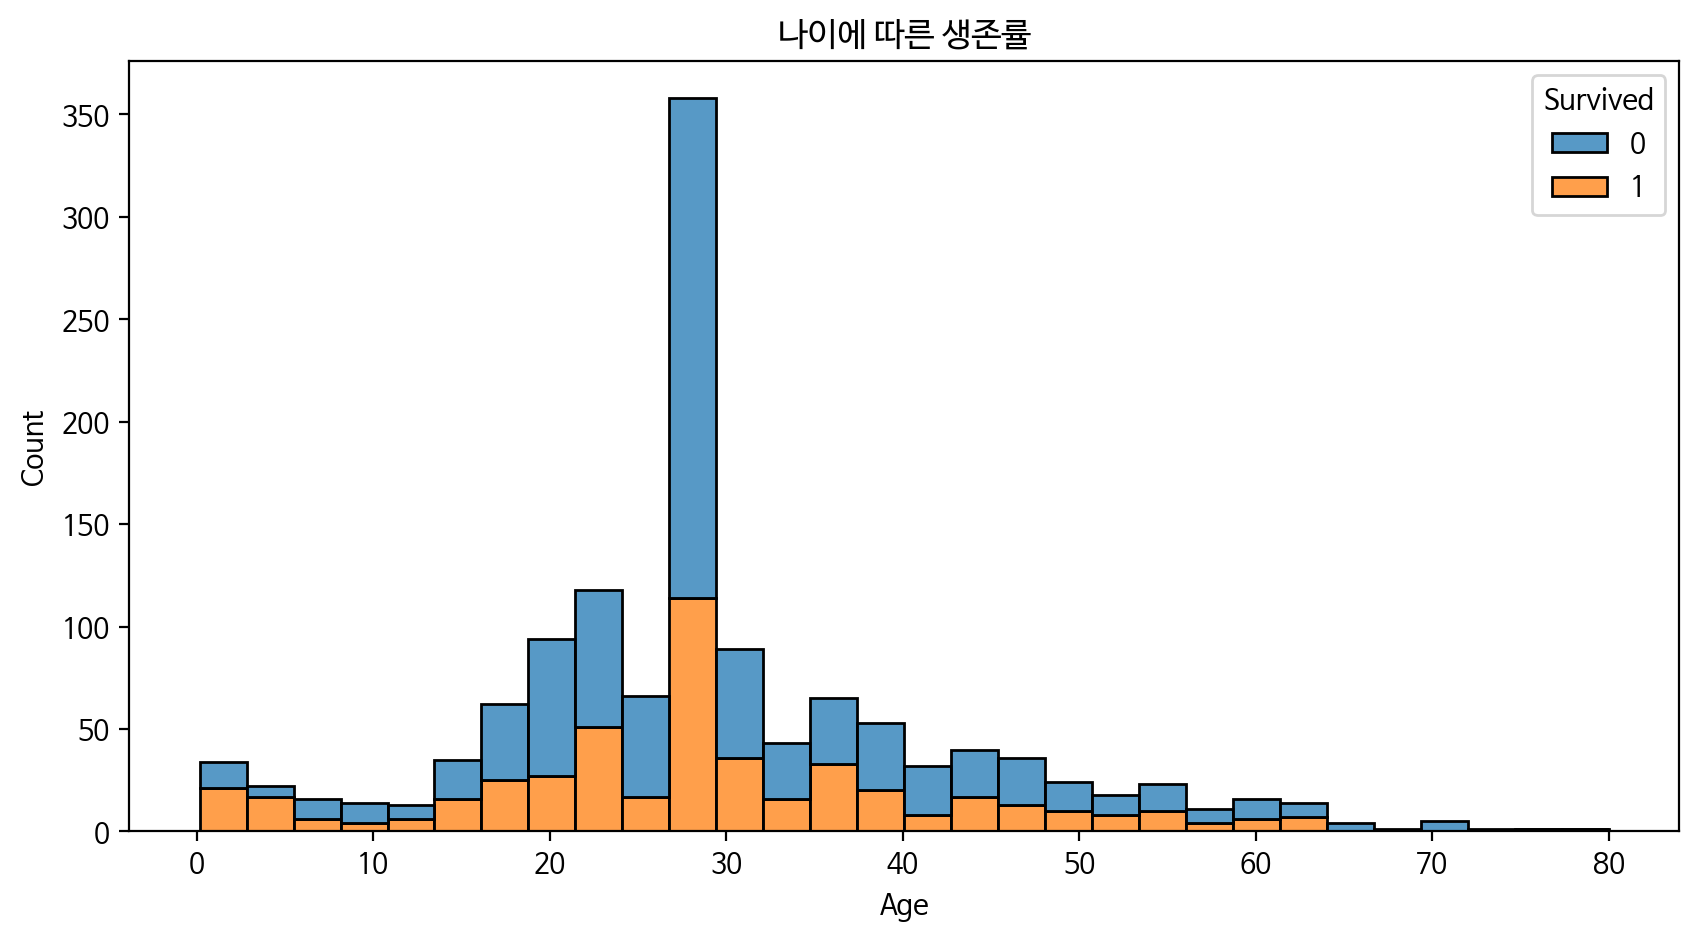

In [24]:
plt.figure(figsize = (10, 5))
sns.histplot(data = titanic, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 30)
plt.title('나이에 따른 생존률')
plt.show()

###### 상자 그림(Boxplot) - 나이와 생존 여부

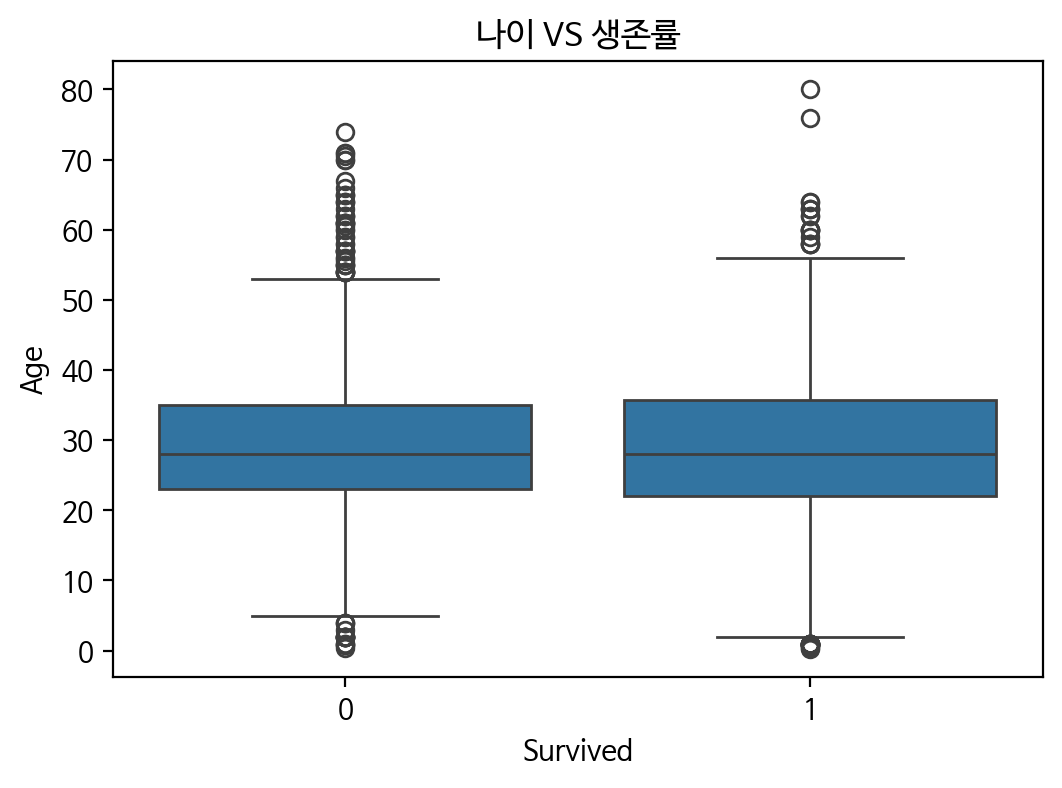

In [25]:
sns.boxplot(x = 'Survived', y = 'Age', data = titanic)
plt.title('나이 VS 생존률')
plt.show()